# Régression polynomiale simple

In [85]:
import pandas as pd 
import numpy as np

from sklearn.datasets import make_regression

import seaborn as sns
from matplotlib import pyplot as plt

## Création du dataset

In [86]:
x, y = make_regression (n_samples=200, n_features=1, noise=10)
y = y + abs(y/2)

y=y.reshape(y.shape[0], 1)

print(x.shape)
print(y.shape)
print(x)
print(y)

(200, 1)
(200, 1)
[[ 5.45044481e-01]
 [-1.20588796e+00]
 [ 2.47513726e+00]
 [ 2.58783949e-01]
 [-7.64294258e-01]
 [ 9.02865011e-01]
 [ 1.13317668e+00]
 [-7.14483600e-01]
 [ 7.11069850e-02]
 [-4.29245036e-01]
 [ 6.94373753e-02]
 [ 1.12339338e-01]
 [-7.93740133e-01]
 [ 4.99504705e-01]
 [-5.27309010e-01]
 [-1.49288894e+00]
 [ 1.46956872e+00]
 [ 2.30031105e+00]
 [ 4.21879010e-01]
 [ 2.54374105e-01]
 [ 5.73577069e-01]
 [ 2.90853665e-01]
 [-3.15210399e-01]
 [ 1.76413366e-01]
 [ 6.97260573e-01]
 [ 1.05623507e-01]
 [ 4.60983173e-01]
 [ 2.99807146e-02]
 [ 4.62587950e-01]
 [ 5.40501200e-01]
 [ 4.46487918e-01]
 [-6.55849723e-01]
 [ 6.78461728e-01]
 [-6.56275851e-01]
 [-8.86497911e-03]
 [ 4.00346829e-01]
 [-5.94136528e-01]
 [ 1.18270662e+00]
 [ 1.27320723e-01]
 [ 2.64335585e-01]
 [-1.50191828e-01]
 [ 3.40546339e-02]
 [ 1.89731017e+00]
 [ 1.28523563e-01]
 [ 1.46067271e+00]
 [ 8.91108292e-03]
 [-2.12282136e-01]
 [ 5.15483961e-01]
 [-5.78994203e-02]
 [ 3.08380157e-01]
 [-5.03139211e-01]
 [-1.36736787

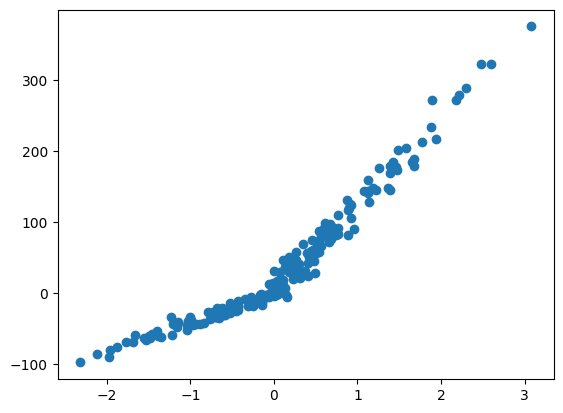

In [87]:
# Représentation graphique du modèle
plt.scatter(x,y)

## Modèle

In [88]:
#notre modèle qui calcule les y_predictions en fonction de x
def model(X, theta):
    return np.dot(X, theta)

## Fonction de coûts

In [89]:
def cout(X, y, theta):
    return (1/(2*len(y))) * np.sum((model(X, theta) - y)**2)


## Descente de Gradient (DG)

In [90]:
#Maintenant, on utilise la descente de gradients pour minimiser la fonction F et trouver les paramètres a, b optimaux
def gradient(X, y, theta):
    return (1/len(y)) * np.dot(X.T, (model(X, theta) - y))

def descenteGradient(X, y, theta, learning_rate, n_iterations):
    histCout=np.zeros(n_iterations)
    for iteration in range(0, n_iterations):
        theta = theta - learning_rate*gradient(X, y, theta)
        histCout[iteration]= cout(X,y,theta)

    return theta, histCout

def coefDet(y, y_predictions):
    u=((y-y_predictions)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

## Prédiction du modèle à l'aide d'une régression polynômiale 

In [91]:
#on va utiliser une régression polynomiale, car cette dernière imite de manière plus fidèle une courbe
#contrairement à un modèle de régression linéaire qui est plus efficace pour les fonctions affines.
theta_pol = np.random.randn(3,1)
print(theta_pol.shape)
print(theta_pol)

(3, 1)
[[-1.44524078]
 [ 0.01944954]
 [-0.48410519]]


In [92]:
X_pol = np.hstack((x**2, x, np.ones(x.shape)))
print(X_pol.shape)
print(X_pol)

(200, 3)
[[ 2.97073486e-01  5.45044481e-01  1.00000000e+00]
 [ 1.45416578e+00 -1.20588796e+00  1.00000000e+00]
 [ 6.12630444e+00  2.47513726e+00  1.00000000e+00]
 [ 6.69691323e-02  2.58783949e-01  1.00000000e+00]
 [ 5.84145713e-01 -7.64294258e-01  1.00000000e+00]
 [ 8.15165228e-01  9.02865011e-01  1.00000000e+00]
 [ 1.28408939e+00  1.13317668e+00  1.00000000e+00]
 [ 5.10486814e-01 -7.14483600e-01  1.00000000e+00]
 [ 5.05620332e-03  7.11069850e-02  1.00000000e+00]
 [ 1.84251301e-01 -4.29245036e-01  1.00000000e+00]
 [ 4.82154909e-03  6.94373753e-02  1.00000000e+00]
 [ 1.26201269e-02  1.12339338e-01  1.00000000e+00]
 [ 6.30023399e-01 -7.93740133e-01  1.00000000e+00]
 [ 2.49504950e-01  4.99504705e-01  1.00000000e+00]
 [ 2.78054792e-01 -5.27309010e-01  1.00000000e+00]
 [ 2.22871738e+00 -1.49288894e+00  1.00000000e+00]
 [ 2.15963222e+00  1.46956872e+00  1.00000000e+00]
 [ 5.29143091e+00  2.30031105e+00  1.00000000e+00]
 [ 1.77981899e-01  4.21879010e-01  1.00000000e+00]
 [ 6.47061852e-02  2.5

In [93]:
#on optimise le modèle avec la descente de gradient
resultDescenteGradientPol = descenteGradient(X_pol, y, theta_pol, 0.01, 1000)
newThetaPol = resultDescenteGradientPol[0]
varCoutPol = resultDescenteGradientPol[1]

print(newThetaPol.shape)
print(newThetaPol)

(3, 1)
[[16.75986811]
 [81.11302006]
 [16.58642073]]


[[ 6.57755371e+01]
 [-5.68551671e+01]
 [ 3.20028333e+02]
 [ 3.86995622e+01]
 [-3.56175896e+01]
 [ 1.03482590e+02]
 [ 1.30022972e+02]
 [-3.28118102e+01]
 [ 2.24388643e+01]
 [-1.51429130e+01]
 [ 2.22995045e+01]
 [ 2.59101154e+01]
 [-3.72371295e+01]
 [ 6.12844259e+01]
 [-2.15250439e+01]
 [-6.71533003e+01]
 [ 1.71982729e+02]
 [ 2.91855281e+02]
 [ 5.37892545e+01]
 [ 3.83039397e+01]
 [ 6.86248290e+01]
 [ 4.15962552e+01]
 [-7.31602647e+00]
 [ 3.14174368e+01]
 [ 8.12915153e+01]
 [ 2.53408409e+01]
 [ 5.75397220e+01]
 [ 1.90333115e+01]
 [ 5.76947305e+01]
 [ 6.53243593e+01]
 [ 5.61435084e+01]
 [-2.94024604e+01]
 [ 7.93332407e+01]
 [-2.94276540e+01]
 [ 1.58686726e+01]
 [ 5.17459922e+01]
 [-2.56895839e+01]
 [ 1.35962945e+02]
 [ 2.71854761e+01]
 [ 3.91985457e+01]
 [ 4.78197013e+00]
 [ 1.93681317e+01]
 [ 2.30814915e+02]
 [ 2.72881997e+01]
 [ 1.70824260e+02]
 [ 1.73105564e+01]
 [ 1.22837332e-01]
 [ 6.28523760e+01]
 [ 1.19462087e+01]
 [ 4.31939019e+01]
 [-1.99819752e+01]
 [ 5.80864535e+00]
 [ 1.0545034

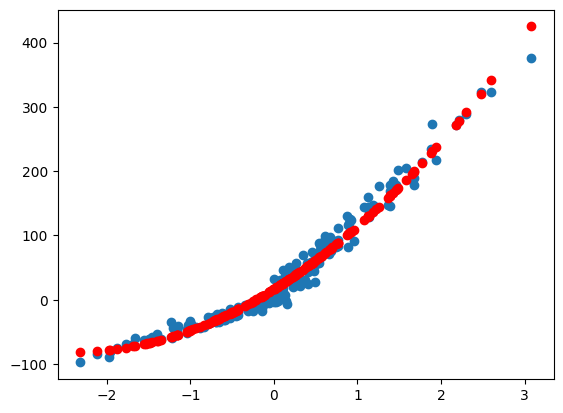

In [94]:
y_predictions_pol = model(X_pol, newThetaPol)
print(y_predictions_pol)
plt.scatter(x, y)
plt.scatter(x, y_predictions_pol, c='red')

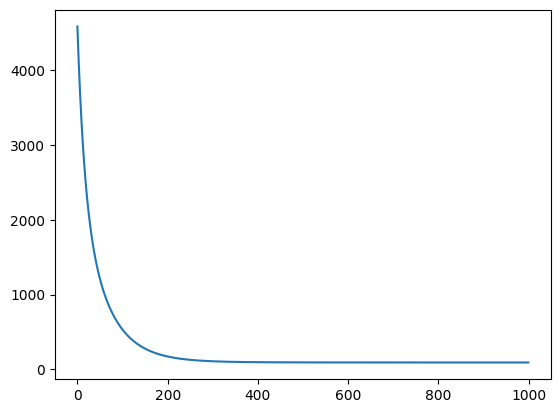

In [95]:
#on affiche la variation des couts au fil de la descente des gradients
plt.plot([i for i in range(1000)], varCoutPol)

In [96]:
#on calcule le coefficient de prédiction, plus le chiffre est proche de 1, mieux la prédiction est fidèle à la réalité
coeffPredictions_pol = coefDet(y, y_predictions_pol)
print(coeffPredictions_pol)

0.9768261059208448
